# Regression Analysis Predicting Dino Fossil Age

The datasets can be found on Kaggle using this link: https://www.kaggle.com/datasets/stealthtechnologies/predict-the-age-of-a-fossil/data.

Libraries used are: 
* Pandas: https://pandas.pydata.org/docs/
* Numpy: https://numpy.org/doc/
* Matplotlib: https://matplotlib.org/
* Keras: https://keras.io/guides/
* Sklearn: https://scikit-learn.org/stable/index.html

## Goal of the document:
Perform exploratory regression analysis using Keras's easy-to-use neural network modules to predict the age of different dinosaur fossils. Additionally, use Sklearn's Gradient Boost and Random Forest Regressors for comparisons. 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

## Read Test Data

In [2]:
# Use pandas to read data
test_df = pd.read_csv('test_data.csv')
# Visualize
test_df.head()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.469986,1.000000,0.667595,29.58,Triassic,Normal polarity,False,0.583560,Limestone,Bottom,120.12,73.83,41072
1,0.619865,0.474208,1.218381,69.87,Cretaceous,Reversed polarity,True,0.942719,Shale,Middle,72.82,191.68,42085
2,0.767736,0.478731,0.119801,96.38,Cretaceous,Normal polarity,False,0.377531,Sandstone,Bottom,105.47,82.25,50436
3,0.275121,0.400594,0.634760,134.10,Triassic,Normal polarity,True,0.323820,Sandstone,Middle,94.99,47.99,25923
4,0.407470,0.039705,0.824597,124.10,Triassic,Normal polarity,False,1.219120,Shale,Middle,139.93,532.62,30272


In [3]:
# Check for any null values
test_df.isnull().sum()

uranium_lead_ratio            0
carbon_14_ratio               0
radioactive_decay_series      0
stratigraphic_layer_depth     0
geological_period             0
paleomagnetic_data            0
inclusion_of_other_fossils    0
isotopic_composition          0
surrounding_rock_type         0
stratigraphic_position        0
fossil_size                   0
fossil_weight                 0
age                           0
dtype: int64

In [4]:
# Check for any duplicates
test_df.duplicated().sum()

0

In [5]:
# Guage shape of data
test_df.shape

(1100, 13)

In [6]:
# Check Range and other statistics about numerical columns
test_df.describe()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,isotopic_composition,fossil_size,fossil_weight,age
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,0.496433,0.440684,0.547931,158.043745,0.956632,69.467227,320.156882,41251.645455
std,0.257374,0.243740,0.292226,90.562171,0.537401,36.274039,189.229364,15593.580441
min,0.003261,0.002765,0.001097,1.210000,0.008463,1.360000,0.050000,6106.000000
25%,0.305624,0.259897,0.318108,87.025000,0.560966,41.440000,173.000000,29536.750000
50%,0.480013,0.434407,0.545213,147.495000,0.902628,68.635000,307.605000,40677.500000
75%,0.674765,0.601421,0.753442,221.847500,1.294061,94.482500,452.320000,50816.250000
max,1.321068,1.000000,1.527375,522.110000,3.148906,176.990000,984.350000,93741.000000


The `.describe()` function here reveals that there are no extremely large ranges among any of the numerical values meaning that the values in the age column will likely not have to be normalized.

## Read Train Data (Executing all the same functions to verify data cleanliness)

In [7]:
train_df = pd.read_csv('train_data.csv')
train_df.head()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.738061,0.487707,0.907884,91.17,Cretaceous,Normal polarity,False,0.915951,Conglomerate,Middle,50.65,432.00,43523
1,0.560096,0.341738,1.121302,165.44,Cambrian,Normal polarity,False,0.803968,Limestone,Top,48.85,353.29,44112
2,0.424773,0.218493,0.103855,218.98,Cambrian,Normal polarity,True,0.792441,Shale,Bottom,37.66,371.33,43480
3,0.349958,0.704649,0.383617,51.09,Permian,Normal polarity,True,0.074636,Limestone,Bottom,39.10,232.84,30228
4,0.886811,0.777494,0.593254,313.72,Devonian,Normal polarity,True,1.646640,Shale,Top,90.84,277.67,67217


In [8]:
train_df.duplicated().sum()

0

In [9]:
train_df['paleomagnetic_data'].unique()

array(['Normal polarity', 'Reversed polarity'], dtype=object)

In [10]:
train_df.isnull().sum()

uranium_lead_ratio            0
carbon_14_ratio               0
radioactive_decay_series      0
stratigraphic_layer_depth     0
geological_period             0
paleomagnetic_data            0
inclusion_of_other_fossils    0
isotopic_composition          0
surrounding_rock_type         0
stratigraphic_position        0
fossil_size                   0
fossil_weight                 0
age                           0
dtype: int64

In [11]:
train_df.shape

(4398, 13)

In [12]:
train_df.describe()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,isotopic_composition,fossil_size,fossil_weight,age
count,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000
mean,0.486938,0.430116,0.532054,152.832801,0.938315,70.702460,326.655177,40586.656435
std,0.257132,0.233536,0.287929,86.272234,0.521643,37.352584,187.032333,15200.700905
min,0.000241,0.000244,0.000076,0.130000,0.000275,0.130000,0.620000,4208.000000
25%,0.294091,0.246269,0.316775,85.390000,0.533519,42.487500,181.047500,29766.250000
50%,0.473715,0.416046,0.511830,146.000000,0.905684,68.785000,308.260000,39567.000000
75%,0.658012,0.590752,0.723805,211.932500,1.289307,96.440000,455.520000,50550.500000
max,1.533270,1.000000,1.513325,494.200000,3.071434,216.390000,1010.090000,103079.000000


The `.describe()` function here reveals that there are no extremely large ranges among any of the numerical values meaning that the values in the age column will likely not have to be normalized.

## Splitting Targets and Predictors

In [13]:
# Define a function to split the target and the Predictors/features
def get_predictors_and_target(data):
    # Define a list of columns 
    data_columns = data.columns

    # Eliminate Age from the list as that is the target and the rest are features
    predictors = data[data_columns[data_columns != 'age']]

    # Set the target series 
    target = data['age'] 
    
    return predictors, target

In [14]:
# Split the training and test sets
test_predictors, test_target = get_predictors_and_target(test_df)
train_predictors, train_target = get_predictors_and_target(train_df)

## Encode the Categorical Variables Into Numerical Ones

The categorical variables as can be seen by the `train_df.head()` output and the `test_df.head()` output are `['paleomagnetic_data', 'inclusion_of_other_fossils','geological_period', 'surrounding_rock_type', 'stratigraphic_position']`. I decided to use both the `OneHotEncoder()` function and the `LabelEncoder()` function as the both have specific positives and negatives and can apply to specific variables from this group. `OneHotEncoder()`seems best poised to be used with the binary variables in this set, while the `LabelEncoder()` seems to be best used for the categories that have more than 2 options.

In [15]:
# Initialize the method
ohe = OneHotEncoder(sparse_output=False)

# Create the Function
def ohe_function(features, ohe):
    # Define Categorical Functions
    categorical_columns = ['paleomagnetic_data', 'inclusion_of_other_fossils']

    # Transform the Features
    encoded_features = ohe.fit_transform(features[categorical_columns])
    encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(categorical_columns))

    # Return Output
    return encoded_df

In [16]:
# Initialize the Method
label_encoder = LabelEncoder()

# Define the function
def encoder(features, label_encoder):
    # Define the categorical variables 
    categorical_columns = ['geological_period', 'surrounding_rock_type', 'stratigraphic_position']

    # Create for loop to interate through the array
    for col in categorical_columns:
        # Apply the function to each instance 
        features[col] = label_encoder.fit_transform(features[col])

    # Return the output
    return features

In [17]:
# Run the OneHotEncoder
encoded_test_predictors_half = ohe_function(test_predictors, ohe)
encoded_train_predictors_half = ohe_function(train_predictors, ohe)

# Merge it with the main dataframes and then drop the columns that were used 
encoded_test_predictors_half = pd.merge(test_predictors, encoded_test_predictors_half, on=encoded_test_predictors_half.index, how='inner')
encoded_test_predictors_half = encoded_test_predictors_half.drop(columns=['paleomagnetic_data', 'inclusion_of_other_fossils', 'key_0'])
encoded_train_predictors_half = pd.merge(train_predictors, encoded_train_predictors_half, on=encoded_train_predictors_half.index, how='inner')
encoded_train_predictors_half = encoded_train_predictors_half.drop(columns=['paleomagnetic_data', 'inclusion_of_other_fossils', 'key_0'])

# Check results
encoded_test_predictors_half.head()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,paleomagnetic_data_Normal polarity,paleomagnetic_data_Reversed polarity,inclusion_of_other_fossils_False,inclusion_of_other_fossils_True
0,0.469986,1.000000,0.667595,29.58,Triassic,0.583560,Limestone,Bottom,120.12,73.83,1.0,0.0,1.0,0.0
1,0.619865,0.474208,1.218381,69.87,Cretaceous,0.942719,Shale,Middle,72.82,191.68,0.0,1.0,0.0,1.0
2,0.767736,0.478731,0.119801,96.38,Cretaceous,0.377531,Sandstone,Bottom,105.47,82.25,1.0,0.0,1.0,0.0
3,0.275121,0.400594,0.634760,134.10,Triassic,0.323820,Sandstone,Middle,94.99,47.99,1.0,0.0,0.0,1.0
4,0.407470,0.039705,0.824597,124.10,Triassic,1.219120,Shale,Middle,139.93,532.62,1.0,0.0,1.0,0.0


In [18]:
# Run the Label Encoder functions
encoded_train_predictors = encoder(encoded_train_predictors_half, label_encoder)
encoded_test_predictors = encoder(encoded_test_predictors_half, label_encoder)

# Check work
encoded_test_predictors.head()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,paleomagnetic_data_Normal polarity,paleomagnetic_data_Reversed polarity,inclusion_of_other_fossils_False,inclusion_of_other_fossils_True
0,0.469986,1.000000,0.667595,29.58,10,0.583560,1,0,120.12,73.83,1.0,0.0,1.0,0.0
1,0.619865,0.474208,1.218381,69.87,2,0.942719,3,1,72.82,191.68,0.0,1.0,0.0,1.0
2,0.767736,0.478731,0.119801,96.38,2,0.377531,2,0,105.47,82.25,1.0,0.0,1.0,0.0
3,0.275121,0.400594,0.634760,134.10,10,0.323820,2,1,94.99,47.99,1.0,0.0,0.0,1.0
4,0.407470,0.039705,0.824597,124.10,10,1.219120,3,1,139.93,532.62,1.0,0.0,1.0,0.0


# See Correlation of each Feature with the Target

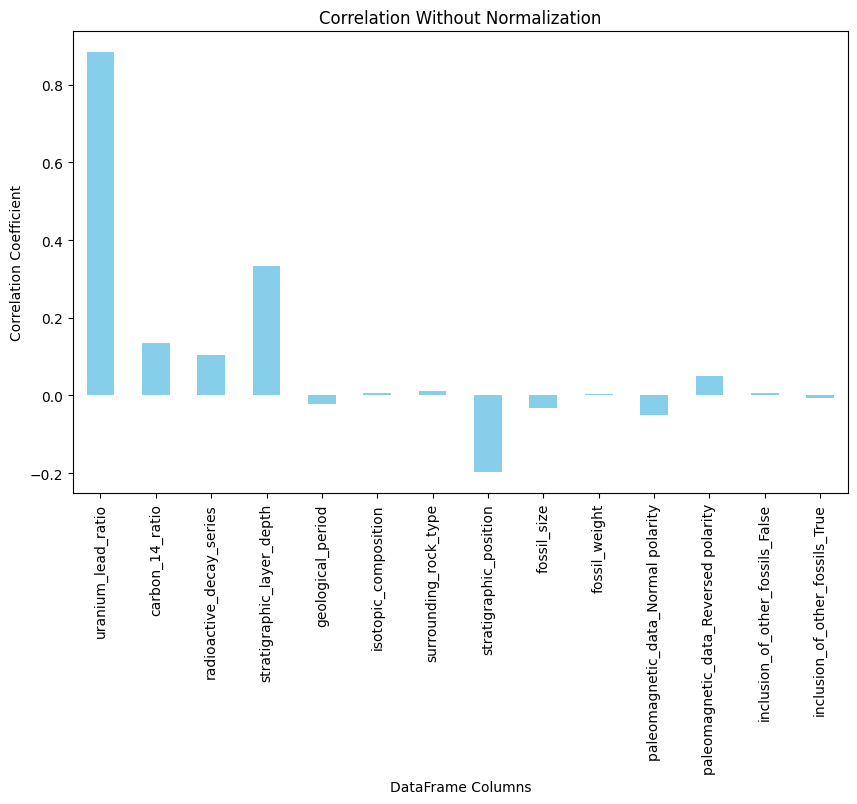

In [19]:
# Calculate the correlation of each DataFrame column with the Series
correlations = encoded_train_predictors.apply(lambda col: col.corr(train_target))

# Visualize the correlations using a bar plot
correlations.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Correlation Without Normalization')
plt.xlabel('DataFrame Columns')
plt.ylabel('Correlation Coefficient')
plt.show()

## See Scatter Plot of lowest correlation (Stratigraphic_position) with the target

C:\Users\sdelo\AppData\Local\Temp\ipykernel_23620\1452091499.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(encoded_train_predictors['stratigraphic_position'], train_target, vmin=0, vmax=100)


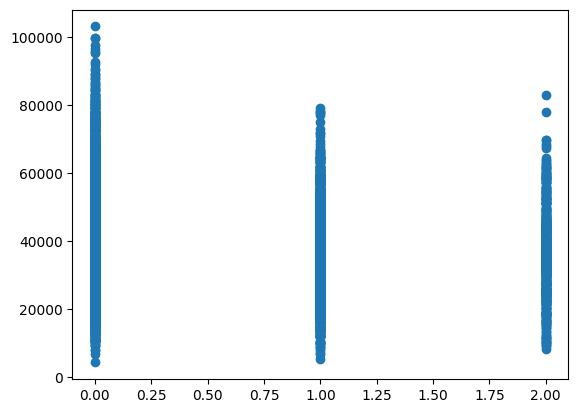

In [20]:
# Initialize Figure
fig, ax = plt.subplots()

# Add data points
ax.scatter(encoded_train_predictors['stratigraphic_position'], train_target, vmin=0, vmax=100)

# Plot
plt.show()

## Feature Normalization

In [21]:
# Define normalization function
def normalize(features):
    # Formula to normalize
    features_norm = (features - features.mean()) / features.std()

    # Return output
    return features_norm

In [22]:
# Normalize features
normal_test_predictors = normalize(encoded_test_predictors)
normal_train_predictors = normalize(encoded_train_predictors)

## Keras Regression

In [23]:
# Get number of columns for the input shape
n_cols_train = normal_train_predictors.shape[1]
n_cols_test = normal_test_predictors.shape[1]

In [24]:
# Print it
n_cols_train

14

In [25]:
# Define regression model
def regression_model():
    # Initialize model
    model = Sequential()

    # Add layers
    model.add(Dense(32, activation='relu', input_shape=(n_cols_train,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Return the model completed 
    return model

In [26]:
# Initialize model
regression = regression_model()

# Fit data
regression.fit(normal_train_predictors, train_target, validation_split=0.3, epochs=50, verbose=2)

# Predict values
predictions = regression.predict(normal_test_predictors)

# Get Error
error = mean_squared_error(y_true=test_target, y_pred=predictions)
print(error)



Epoch 1/50

97/97 - 6s - loss: 1868568192.0000 - val_loss: 1622232704.0000 - 6s/epoch - 59ms/step
Epoch 2/50
97/97 - 1s - loss: 506916032.0000 - val_loss: 46302100.0000 - 705ms/epoch - 7ms/step
Epoch 3/50
97/97 - 1s - loss: 30944316.0000 - val_loss: 23652046.0000 - 699ms/epoch - 7ms/step
Epoch 4/50
97/97 - 1s - loss: 20525422.0000 - val_loss: 19379420.0000 - 756ms/epoch - 8ms/step
Epoch 5/50
97/97 - 1s - loss: 17871246.0000 - val_loss: 17528944.0000 - 687ms/epoch - 7ms/step
Epoch 6/50
97/97 - 1s - loss: 15736338.0000 - val_loss: 15349402.0000 - 710ms/epoch - 7ms/step
Epoch 7/50
97/97 - 1s - loss: 14169774.0000 - val_loss: 14044033.0000 - 684ms/epoch - 7ms/step
Epoch 8/50
97/97 - 1s - loss: 12846345.0000 - val_loss: 12633463.0000 - 741ms/epoch - 8ms/step
Epoch 9/50
97/97 - 1s - loss: 11750232.0000 - val_loss: 11638647.0000 - 712ms/epoch - 7ms/step
Epoch 10/50
97/97 - 1s - loss: 10815006.0000 - val_loss: 11075041.0000 - 691ms/epoch - 7ms/step
Epoch 11/50
97/97 - 1s - loss: 10012100.000

## Gradient Boost 

In [27]:
# Initialize and train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=99)
gb_model.fit(normal_train_predictors, train_target)

# Make predictions
y_pred_gb = gb_model.predict(normal_test_predictors)

# Evaluate the model
mse_gb = mean_squared_error(test_target, y_pred_gb)

# MSE
mse_gb

4698167.223529762

## Random Forest Regressor 

In [28]:
# Initialize Model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit model
model.fit(normal_train_predictors, train_target)
predictions = model.predict(normal_test_predictors)

# Get error
mse = mean_squared_error(test_target, predictions)
mse

7451837.155708273

## Normalized Target

Since the targets are not that far apart as was shown in the `.summarize()` function output this is not necessary, but I wanted to experiment what the change would do to the error. 

In [29]:
# Reuse the noramlize function 
normal_test_target = normalize(test_target)
normal_train_target = normalize(train_target)

## Keras Regression with Normalized Target

In [30]:
# Initialize the function 
regression_both_normal = regression_model()

# Fit the function
regression_both_normal.fit(normal_train_predictors, normal_train_target, validation_split=0.3, epochs=50, verbose=2)
predictions_both_normal = regression_both_normal.predict(normal_test_predictors)

# Get Error
error_both_normal = mean_squared_error(y_true=normal_test_target, y_pred=predictions_both_normal)
error_both_normal

Epoch 1/50
97/97 - 2s - loss: 0.4338 - val_loss: 0.0936 - 2s/epoch - 18ms/step
Epoch 2/50
97/97 - 0s - loss: 0.0667 - val_loss: 0.0579 - 273ms/epoch - 3ms/step
Epoch 3/50
97/97 - 0s - loss: 0.0397 - val_loss: 0.0382 - 236ms/epoch - 2ms/step
Epoch 4/50
97/97 - 0s - loss: 0.0314 - val_loss: 0.0367 - 247ms/epoch - 3ms/step
Epoch 5/50
97/97 - 0s - loss: 0.0271 - val_loss: 0.0312 - 266ms/epoch - 3ms/step
Epoch 6/50
97/97 - 0s - loss: 0.0228 - val_loss: 0.0253 - 251ms/epoch - 3ms/step
Epoch 7/50
97/97 - 0s - loss: 0.0204 - val_loss: 0.0249 - 256ms/epoch - 3ms/step
Epoch 8/50
97/97 - 0s - loss: 0.0185 - val_loss: 0.0240 - 251ms/epoch - 3ms/step
Epoch 9/50
97/97 - 0s - loss: 0.0168 - val_loss: 0.0228 - 281ms/epoch - 3ms/step
Epoch 10/50
97/97 - 0s - loss: 0.0171 - val_loss: 0.0206 - 264ms/epoch - 3ms/step
Epoch 11/50
97/97 - 0s - loss: 0.0147 - val_loss: 0.0296 - 248ms/epoch - 3ms/step
Epoch 12/50
97/97 - 0s - loss: 0.0142 - val_loss: 0.0218 - 262ms/epoch - 3ms/step
Epoch 13/50
97/97 - 0s - lo

0.01979113720410458

## GB Model with Normalized Target

In [31]:
# Initialize model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=99)

# fit model
gb_model.fit(normal_train_predictors, normal_train_target)

# Make predictions
y_pred_gb = gb_model.predict(normal_test_predictors)

# Get Error
mse_gb = mean_squared_error(normal_test_target, y_pred_gb)
mse_gb

0.014040134183034321

## Random Forest with Normalized Target

In [32]:
# Initialize Model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit and predict with model
model.fit(normal_train_predictors, normal_train_target)
predictions = model.predict(normal_test_predictors)

# Get error
mse = mean_squared_error(normal_test_target, predictions)
mse

0.025872609583191708

## Keras Regression with no normalization

In [33]:
# Initialize the function 
regression_no_normal = regression_model()

# Fit the function
regression_no_normal.fit(encoded_train_predictors, train_target, validation_split=0.3, epochs=50, verbose=2)
predictions_no_normal = regression_no_normal.predict(encoded_test_predictors)

# Get Error
error_no_normal = mean_squared_error(y_true=test_target, y_pred=predictions_no_normal)
error_no_normal

Epoch 1/50
97/97 - 2s - loss: 1527609984.0000 - val_loss: 509214528.0000 - 2s/epoch - 19ms/step
Epoch 2/50
97/97 - 0s - loss: 380875136.0000 - val_loss: 329590400.0000 - 260ms/epoch - 3ms/step
Epoch 3/50
97/97 - 0s - loss: 303416960.0000 - val_loss: 301723872.0000 - 287ms/epoch - 3ms/step
Epoch 4/50
97/97 - 0s - loss: 289814976.0000 - val_loss: 290927200.0000 - 349ms/epoch - 4ms/step
Epoch 5/50
97/97 - 0s - loss: 286483904.0000 - val_loss: 287533728.0000 - 301ms/epoch - 3ms/step
Epoch 6/50
97/97 - 0s - loss: 284658624.0000 - val_loss: 285080896.0000 - 259ms/epoch - 3ms/step
Epoch 7/50
97/97 - 0s - loss: 280997312.0000 - val_loss: 282408960.0000 - 262ms/epoch - 3ms/step
Epoch 8/50
97/97 - 0s - loss: 279606400.0000 - val_loss: 283175008.0000 - 248ms/epoch - 3ms/step
Epoch 9/50
97/97 - 0s - loss: 276977472.0000 - val_loss: 279375072.0000 - 278ms/epoch - 3ms/step
Epoch 10/50
97/97 - 0s - loss: 273993376.0000 - val_loss: 278055232.0000 - 251ms/epoch - 3ms/step
Epoch 11/50
97/97 - 0s - loss:

46704772.06399415

## Gradient Boost with no normalization

In [34]:
# Initialize model
gb_model_no_normal = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=99)

# fit model
gb_model_no_normal.fit(encoded_train_predictors, train_target)

# Make predictions
y_pred_gb_no_normal = gb_model_no_normal.predict(encoded_test_predictors)

# Get Error
mse_gb_no_normal = mean_squared_error(test_target, y_pred_gb_no_normal)
mse_gb_no_normal

3433994.075353985

## Random Forst with no normalization

In [35]:
# Initialize Model
model_no_normal = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit and predict with model
model_no_normal.fit(encoded_train_predictors, train_target)
predictions_no_normal = model_no_normal.predict(encoded_test_predictors)

# Get error
mse_no_normal = mean_squared_error(test_target, predictions_no_normal)
mse_no_normal

6487572.049607909